In [1]:
#questa analisi punta ad analizzare il catalogo netflix attuale, focalizzando poi l'attenzione sui contenuti francesi sulla piattaforma e su possibili spunti di miglioramento

# inizio importando le librerie rilevanti e pulendo il mio dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")
netflix_db=pd.read_csv("netflix_titles.csv")
netflix_db.dropna(subset=["date_added"], inplace=True)
netflix_db["date_added"]=netflix_db["date_added"].str.strip()
netflix_db["date_added"]=pd.to_datetime(netflix_db["date_added"], errors="coerce")
netflix_db.head(5)

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [2]:
# visualizzo alcune informazioni basilari sul mio database
netflix_db.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

In [3]:
# visualizzo le colonne presenti
netflix_db.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
# controllo che non ci siano duplicati
netflix_db.duplicated().sum()

0

In [5]:
# osservo che tipo di dati è contenuto nella colonna "type"
netflix_db["type"].value_counts()

type
Movie      6131
TV Show    2666
Name: count, dtype: int64

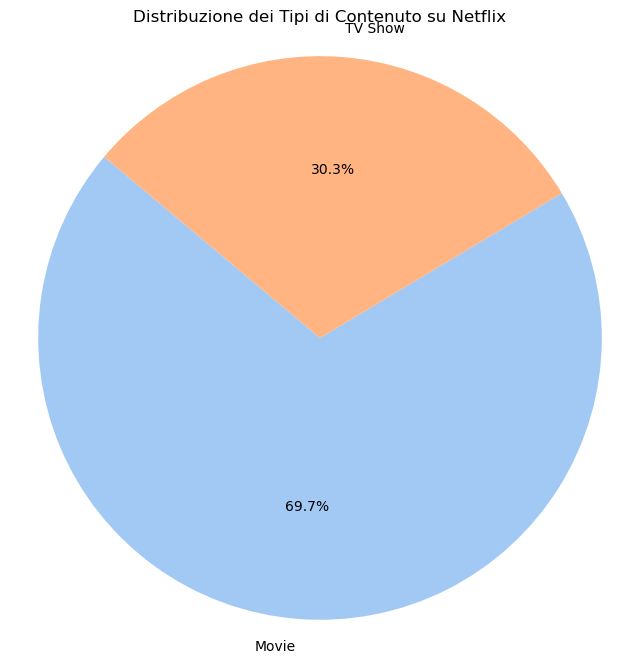

In [6]:
# visualizzo la distribuzione dei dati con un grafico a torta
type_counts=netflix_db["type"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribuzione dei Tipi di Contenuto su Netflix")
plt.axis("equal")
plt.show()

In [7]:
# creo una nuova visualizzazione del database, propedeutica all'analisi dei dati per mese
netflix_db["date_added"].dt.month
netflix_db["date_added_month"]=netflix_db["date_added"].dt.month.fillna(-1).astype(int)
month_db=netflix_db[netflix_db["date_added_month"].between(1, 12)]
month_db["date_added_month"]=month_db["date_added_month"].astype("Int64")
month_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8797 non-null   object        
 1   type              8797 non-null   object        
 2   title             8797 non-null   object        
 3   director          6173 non-null   object        
 4   cast              7972 non-null   object        
 5   country           7967 non-null   object        
 6   date_added        8797 non-null   datetime64[ns]
 7   release_year      8797 non-null   int64         
 8   rating            8793 non-null   object        
 9   duration          8794 non-null   object        
 10  listed_in         8797 non-null   object        
 11  description       8797 non-null   object        
 12  date_added_month  8797 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(10)
memory usage: 970.8+ KB


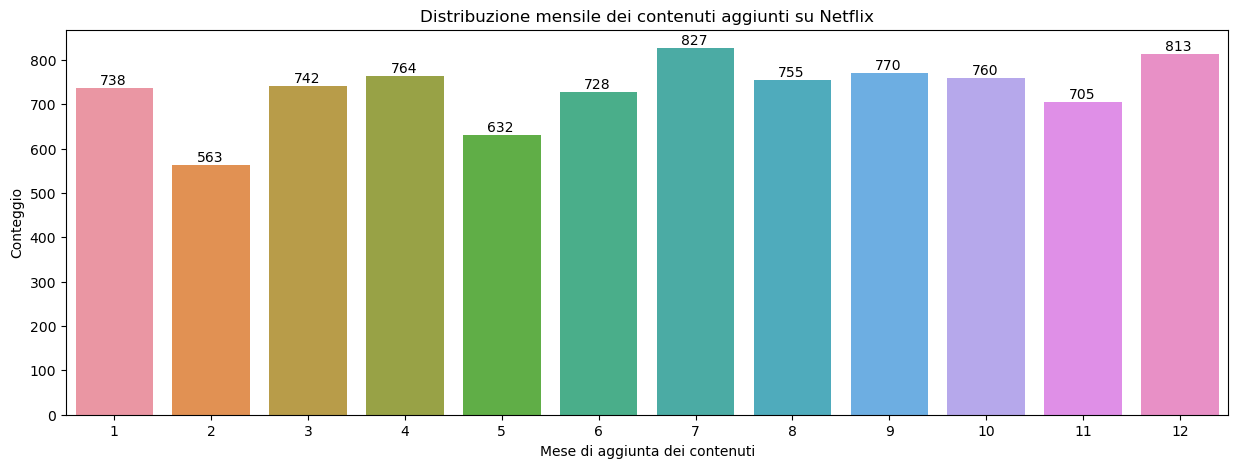

In [8]:
# creo un grafico a barre per visualizzare le uscite per mese su Netflix
plt.figure(figsize=(15, 5))
ax=sns.countplot(x="date_added_month", data=month_db)
plt.xlabel("Mese di aggiunta dei contenuti")
plt.ylabel("Conteggio")
plt.title("Distribuzione mensile dei contenuti aggiunti su Netflix")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va="bottom", color="black")
plt.show()

In [9]:
# creo una nuova visualizzazione del database, propedeutica all'analisi dei dati per giorno
netflix_db["date_added_day"]=netflix_db["date_added"].dt.day.fillna(-1).astype(int)
day_db=netflix_db[netflix_db["date_added_day"].between(1, 31)]
day_db["date_added_day"]=day_db["date_added_day"].astype("Int64")
day_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8797 non-null   object        
 1   type              8797 non-null   object        
 2   title             8797 non-null   object        
 3   director          6173 non-null   object        
 4   cast              7972 non-null   object        
 5   country           7967 non-null   object        
 6   date_added        8797 non-null   datetime64[ns]
 7   release_year      8797 non-null   int64         
 8   rating            8793 non-null   object        
 9   duration          8794 non-null   object        
 10  listed_in         8797 non-null   object        
 11  description       8797 non-null   object        
 12  date_added_month  8797 non-null   int64         
 13  date_added_day    8797 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1

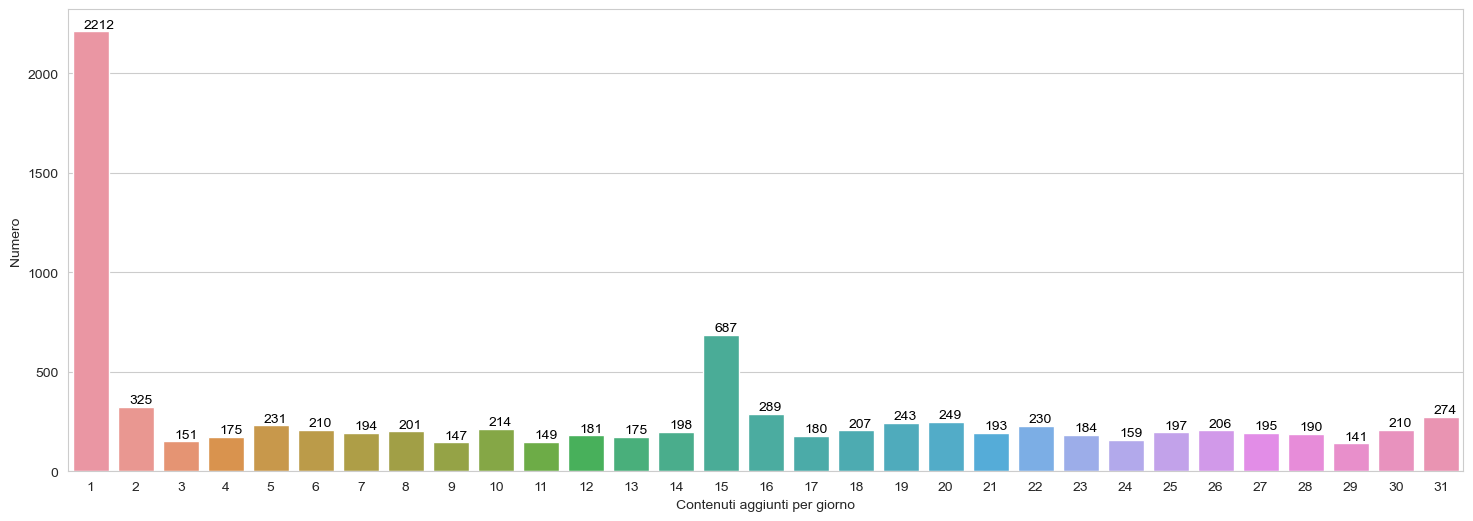

In [10]:
# creo un grafico a barre per visualizzare le uscite per giorno su Netflix
plt.figure(figsize=(18, 6))
sns.set_style("whitegrid")
ax=sns.countplot(x="date_added_day", data=day_db)
plt.xlabel("Contenuti aggiunti per giorno")
plt.ylabel("Numero")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va="bottom", color="black")

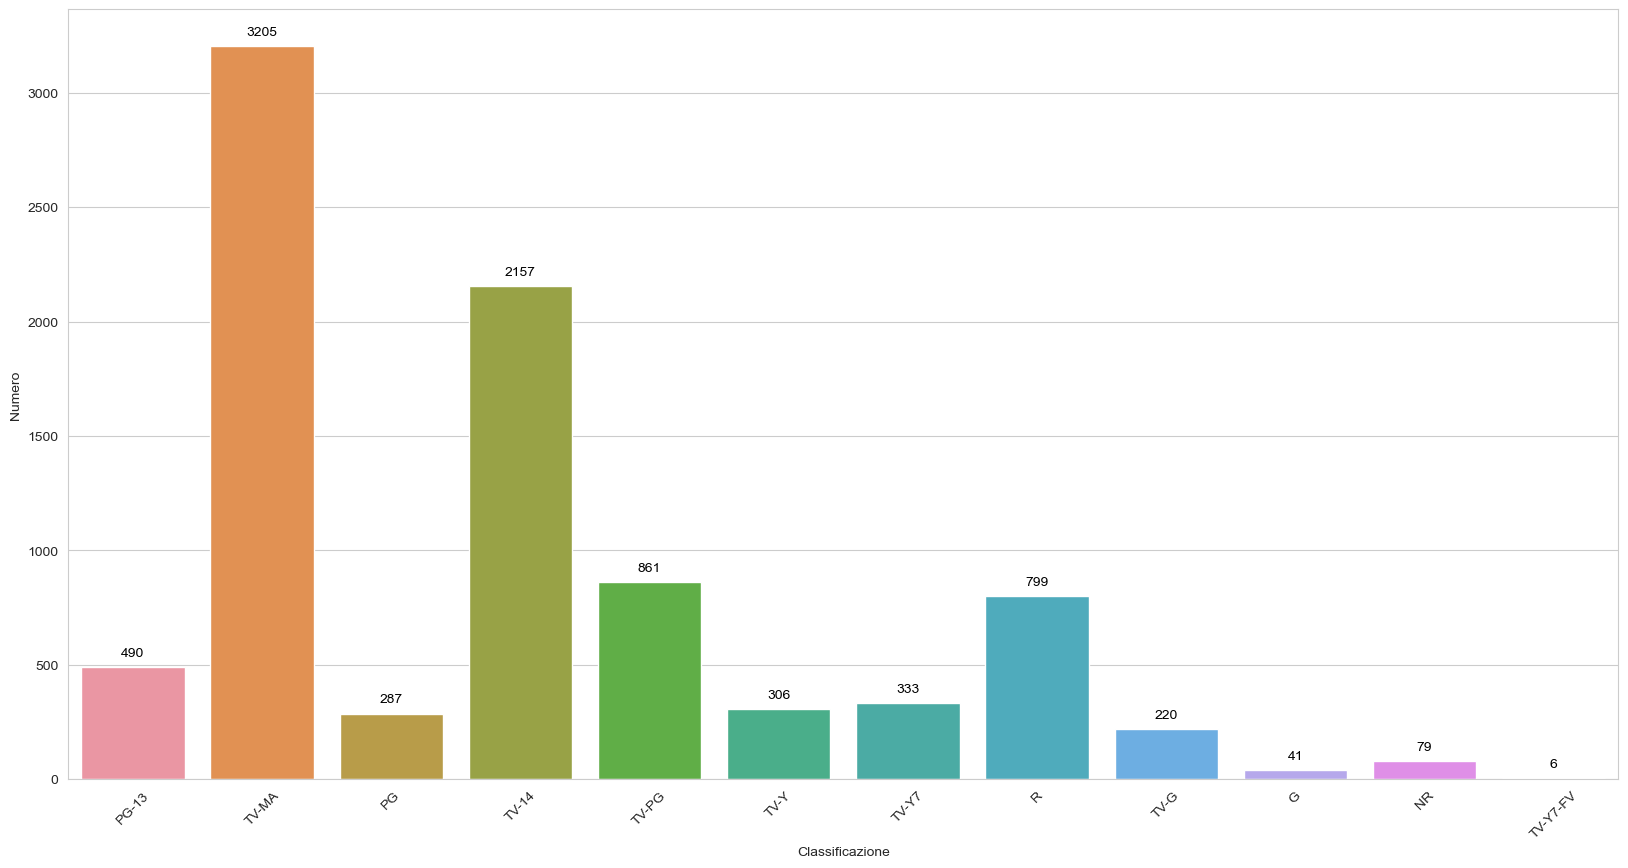

In [11]:
# osservo i titoli presenti su Netflix sulla base della loro classificazione per età
f_db=netflix_db.groupby("rating").filter(lambda x: len(x)>=5)
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")
ax=sns.countplot(x="rating", data=f_db)
plt.xlabel("Classificazione")
plt.ylabel("Numero")
plt.xticks(rotation=45)
for p in ax.patches:
    height=int(p.get_height())
    ax.annotate(height, (p.get_x()+p.get_width()/2., height),
                ha="center", va="center", xytext=(0, 10), textcoords="offset points", color="black")
plt.show()

In [12]:
# filtro il catalogo di Netflix per visualizzare solo i film usciti nel 2000
netflix_db[(netflix_db["type"]=="Movie")&(netflix_db["release_year"]==2000)]

show_id   type                                              title  \
180     s181  Movie                 The Nutty Professor II: The Klumps   
350     s351  Movie                                      Space Cowboys   
359     s360  Movie                       The Original Kings of Comedy   
566     s567  Movie                                   Charlie's Angels   
593     s594  Movie                                           Snow Day   
779     s780  Movie                                  Battlefield Earth   
952     s953  Movie                               The Whole Nine Yards   
3472   s3473  Movie                        Rugrats in Paris: The Movie   
4545   s4546  Movie             Monty Python: Before the Flying Circus   
4723   s4724  Movie                                               Fiza   
4956   s4957  Movie                        Phir Bhi Dil Hai Hindustani   
5953   s5954  Movie                             Joseph: King of Dreams   
6006   s6007  Movie                                            28 Days   
6147   s6148  Movie                                    American Psycho   
6154   s6155  Movie  An American Tail: The Treasures of Manhattan I...   
6311   s6312  Movie                                       Billy Elliot   
6437   s6438  Movie                                       Center Stage   
6440   s6441  Movie                                     Chal Mere Bhai   
6543   s6544  Movie                     Crouching Tiger, Hidden Dragon   
6643   s6644  Movie                       Dragonheart: A New Beginning   
6753   s6754  Movie                                  Final Destination   
6912   s6913  Movie                          Hamara Dil Aapke Paas Hai   
7013   s7014  Movie                     How the Grinch Stole Christmas   
7247   s7248  Movie                                          Kya Kehna   
7316   s7317  Movie                                       Little Nicky   
7702   s7703  Movie                                     Papa the Great   
7801   s7802  Movie                                              Pukar   
7955   s7956  Movie                                        Scary Movie   
7962   s7963  Movie                                           Scream 3   
8196   s8197  Movie                                     The Art of War   
8305   s8306  Movie                 The Flintstones in Viva Rock Vegas   
8722   s8723  Movie                                  What Lies Beneath   
8729   s8730  Movie                                 Where the Money Is   

                           director  \
180                     Peter Segal   
350                  Clint Eastwood   
359                       Spike Lee   
566                             McG   
593                      Chris Koch   
779                 Roger Christian   
952                   Jonathan Lynn   
3472   Stig Bergqvist, Paul Demeyer   
4545                      Will Yapp   
4723                 Khalid Mohamed   
4956                     Aziz Mirza   
5953  Rob LaDuca, Robert C. Ramirez   
6006                   Betty Thomas   
6147                    Mary Harron   
6154                   Larry Latham   
6311                 Stephen Daldry   
6437                Nicholas Hytner   
6440                   David Dhawan   
6543                        Ang Lee   
6643                    Doug Lefler   
6753                     James Wong   
6912                 Satish Kaushik   
7013                     Ron Howard   
7247                    Kundan Shah   
7316                    Steve Brill   
7702                      Bhagyaraj   
7801              Rajkumar Santoshi   
7955            Keenen Ivory Wayans   
7962                     Wes Craven   
8196               Christian Duguay   
8305                   Brian Levant   
8722                Robert Zemeckis   
8729                Marek Kanievska   

                                                   cast  \
180   Eddie Murphy, Janet Jackson, Larry Miller, Joh...   
350   Clint Eastwood, Tommy Lee Jones, Dona

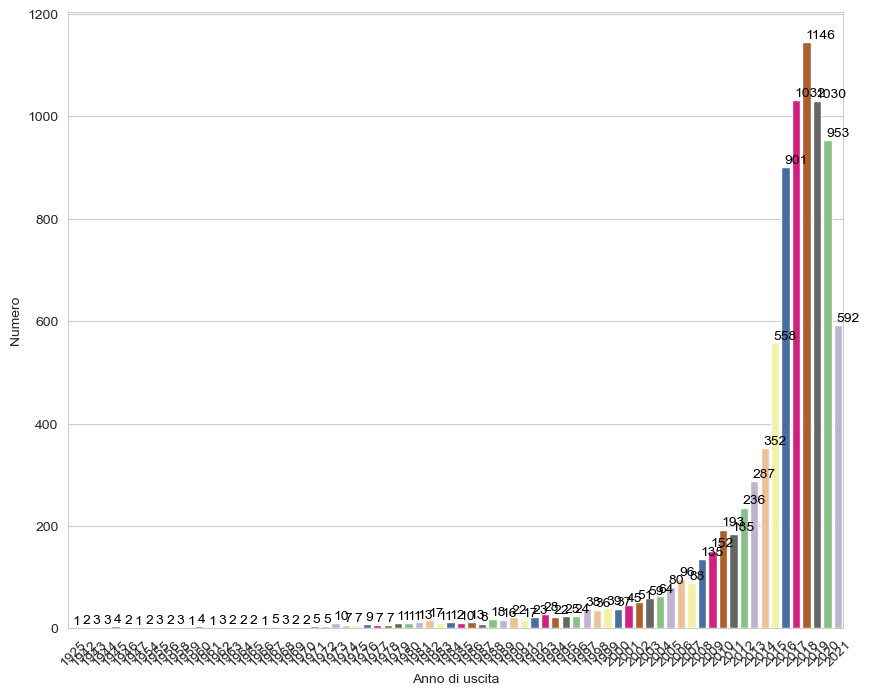

In [77]:
#creo un grafico che conti i contenuti su Netflix in base al loro anno di uscita
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
ax=sns.countplot(x="release_year", data=netflix_db, palette ="Accent")
plt.xlabel("Anno di uscita")
plt.ylabel("Numero")
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va="bottom", color="black")

In [14]:
# analizzo il database in base al paese in cui i contenuti sono stati girati
country_count=netflix_db.copy()
country_count=pd.concat([country_count, netflix_db["country"].str.split(",", expand=True)], axis=1)
country_count

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

     date_added  release_year rating   duration  ...     2     3     4     5  \
0    2021-09-25          2020  PG-13     90 min  ...  None  None  None  None   
1    2021-09-24          2021  TV-MA  2 Seasons  ...  None  None  None  None   
2    2021-09-24          2021  TV-MA   1 Season  ...  None  None  None  None   
3    2021-09-24          2021  TV-MA   1 Season  ...  None  None  None  None   
4    2021-09-24          2021  TV-MA  2 Seasons  ...  None  None  None  None   
...         ...           ...    ...        ...  ...   ...   ...   ...   ...   
8802 2019-11-20          2007      R    158 min  ...  None  None  None  None   
8803 2019-07-01          2018  TV-Y7  2 Seasons  ...  None  None  None  None   
8804 2019-11-01          2009      R     88 min  ...  None  None  None  None   
8805 2020-01-11          2006     PG     88 min  ...  None  None  None  None   
8806 2019-03-02          2015  TV-14    111 min  ...  None  None  None  None   

         6     7     8     9    10    11  
0     None  None  None  None  None  None  
1     None  None  None  None  None  None  
2     None  None  None  None  None  None  
3     None  None  None  None  None  None  
4     None  None  None  None  None  None  
...    ...   ...   ...   ...   ...   ...  
8802  None  None  None  None  None  None  
8803  None  None  None  None  None  None  
8804  None  None  None  None  None  None  
8805  None  None  None  None  None  None  
8806  None  None  None  None  None  None  

[8797 rows x 26 columns]

In [15]:
# visualizzo tutte le righe che non sono nulle nella colonna country
country_count=netflix_db.copy()
country_count=pd.concat([country_count, netflix_db["country"].str.split(",", expand=True)], axis=1)
country_count=country_count.melt(id_vars=["type", "title"], value_vars=range(12), var_name="country_var", value_name="paese")
country_count=country_count[country_count["paese"].notna()]
country_count

type                          title country_var           paese
0         Movie           Dick Johnson Is Dead           0   United States
1       TV Show                  Blood & Water           0    South Africa
4       TV Show                   Kota Factory           0           India
7         Movie                        Sankofa           0   United States
8       TV Show  The Great British Baking Show           0  United Kingdom
...         ...                            ...         ...             ...
78769     Movie            The Look of Silence           8         Germany
85404     Movie                       Barbecue           9          Sweden
87566     Movie            The Look of Silence           9     Netherlands
94201     Movie                       Barbecue          10   United States
102998    Movie                       Barbecue          11         Uruguay

[10010 rows x 4 columns]

In [16]:
# conto i valori presenti nella colonna country, escludendo eventuali valori nulli o vuoti
country_count=country_count[country_count["paese"].notna()]
country_count["paese"].nunique()

197

In [17]:
# creo una visualizzazione con la top 5 dei paesi più popolari
country_count["paese"]=country_count["paese"].str.strip()
country_count["paese"].value_counts()[:10]

paese
United States     3684
India             1046
United Kingdom     805
Canada             445
France             393
Japan              317
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64

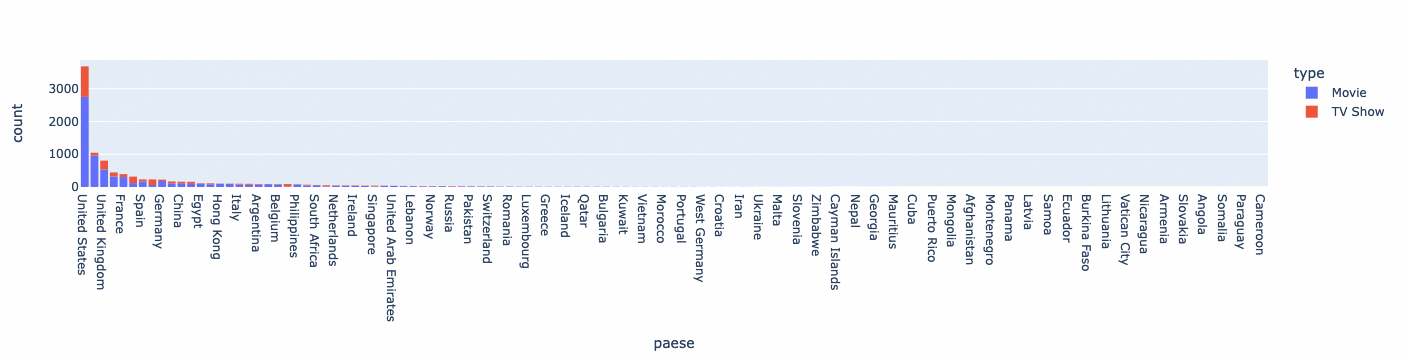

In [18]:
# traduco i numeri appena ottenuti in un grafico
px.histogram(country_count, "paese", color="type").update_xaxes(categoryorder="total descending")

In [19]:
# visualizzo il database facendo particolare attenzione alla colonna cast
cast_count=netflix_db.copy()
cast_count=pd.concat([cast_count, netflix_db["cast"].str.split(",", expand=True)], axis=1)
cast_count

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

     date_added  release_year rating   duration  ...    40    41    42    43  \
0    2021-09-25          2020  PG-13     90 min  ...   NaN   NaN   NaN   NaN   
1    2021-09-24          2021  TV-MA  2 Seasons  ...   NaN   NaN   NaN   NaN   
2    2021-09-24          2021  TV-MA   1 Season  ...   NaN   NaN   NaN   NaN   
3    2021-09-24          2021  TV-MA   1 Season  ...   NaN   NaN   NaN   NaN   
4    2021-09-24          2021  TV-MA  2 Seasons  ...   NaN   NaN   NaN   NaN   
...         ...           ...    ...        ...  ...   ...   ...   ...   ...   
8802 2019-11-20          2007      R    158 min  ...  None  None  None  None   
8803 2019-07-01          2018  TV-Y7  2 Seasons  ...  None  None  None  None   
8804 2019-11-01          2009      R     88 min  ...  None  None  None  None   
8805 2020-01-11          2006     PG     88 min  ...  None  None  None  None   
8806 2019-03-02          2015  TV-14    111 min  ...  None  None  None  None   

        44    45    46    47    48    49  
0      NaN   NaN   NaN   NaN   NaN   NaN  
1      NaN   NaN   NaN   NaN   NaN   NaN  
2      NaN   NaN   NaN   NaN   NaN   NaN  
3      NaN   NaN   NaN   NaN   NaN   NaN  
4      NaN   NaN   NaN   NaN   NaN   NaN  
...    ...   ...   ...   ...   ...   ...  
8802  None  None  None  None  None  None  
8803  None  None  None  None  None  None  
8804  None  None  None  None  None  None  
8805  None  None  None  None  None  None  
8806  None  None  None  None  None  None  

[8797 rows x 64 columns]

In [20]:
# conto gli attori presenti all'interno del database
unique_actors=pd.unique(netflix_db['cast'].str.split(', ').explode())
num_unique_actors=len(unique_actors)
print("Numero di attori non ripetuti:", num_unique_actors)

Numero di attori non ripetuti: 36404


In [21]:
# isolo la top 20 degli attori che appaiono in più contenuti all'interno del database
flat_cast=netflix_db["cast"].str.split(", ").explode()
actor_counts=flat_cast.value_counts()
top_20_actors=actor_counts.head(20)
print("Top 20 attori per numero di film:")
print(top_20_actors)

Top 20 attori per numero di film:
cast
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Takahiro Sakurai     32
Naseeruddin Shah     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Paresh Rawal         28
Amitabh Bachchan     28
Boman Irani          27
Rajesh Kava          26
Vincent Tong         26
Andrea Libman        25
Kareena Kapoor       25
Samuel L. Jackson    24
John Cleese          24
Fred Tatasciore      23
Tara Strong          23
Name: count, dtype: int64


In [22]:
# analizzo i titoli nel database sulla base del genere di media
listed_in_split=netflix_db["listed_in"].str.split(", ", expand=True)
listed_in_count=pd.concat([netflix_db["title"], listed_in_split], axis=1)

listed_in_count_melted=listed_in_count.melt(id_vars=["title"], value_vars=[0, 1, 2], 
                                              var_name="genre_num", value_name="genre").dropna()
print("Genere di ciascun film:")
print(listed_in_count_melted[["title", "genre"]])

Genere di ciascun film:
                       title                   genre
0       Dick Johnson Is Dead           Documentaries
1              Blood & Water  International TV Shows
2                  Ganglands          Crime TV Shows
3      Jailbirds New Orleans              Docuseries
4               Kota Factory  International TV Shows
...                      ...                     ...
26384     Zindagi Gulzar Hai               TV Dramas
26385                Zinzana               Thrillers
26386                 Zodiac               Thrillers
26387            Zombie Dumb             TV Comedies
26390                 Zubaan        Music & Musicals

[19303 rows x 2 columns]


In [23]:
# conto i generi distinti presenti nel database
unique_genres = listed_in_count_melted['genre'].nunique()
print("\nNumber of unique genres:", unique_genres)


Number of unique genres: 42


In [24]:
# creo la top 10 dei generi presenti
top_10_genres = listed_in_count_melted['genre'].value_counts().head(10)
print("\nTop 10 genres by frequency:")
print(top_10_genres)


Top 10 genres by frequency:
genre
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


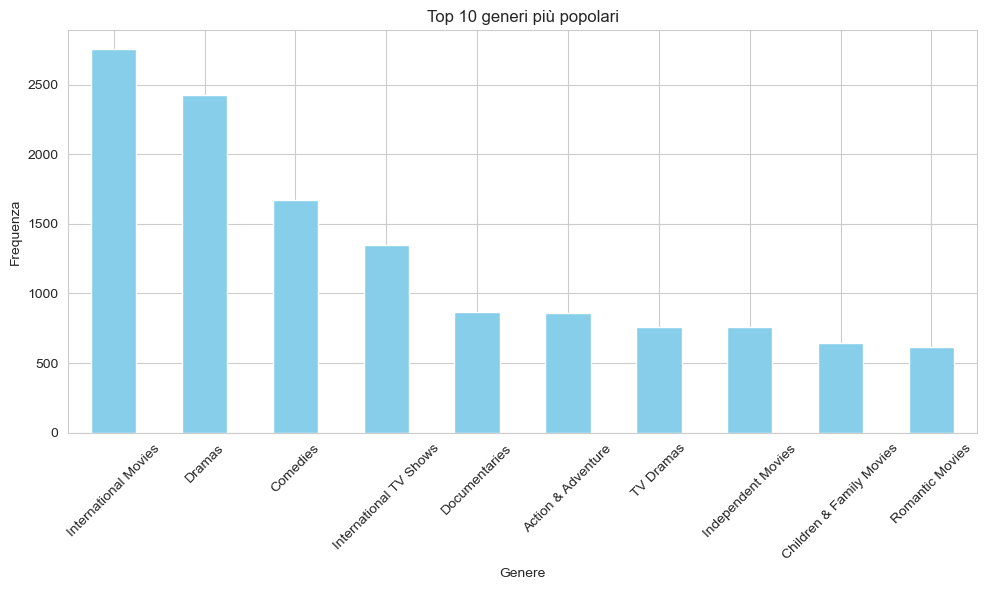

In [25]:
# visualizzo la top 10 con un grafico
plt.figure(figsize=(10, 6))
top_10_genres.plot(kind="bar", color="skyblue")
plt.title("Top 10 generi più popolari")
plt.xlabel("Genere")
plt.ylabel("Frequenza")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

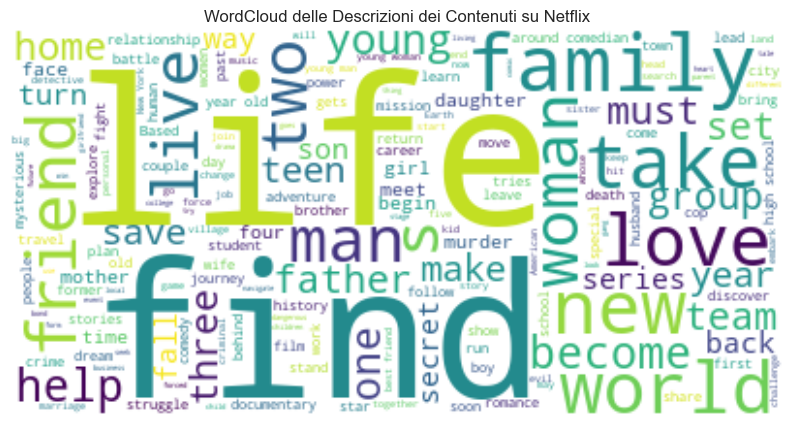

In [26]:
# creo un wordcloud con leparole più comuni nelle descrizioni dei contenuti
text=" ".join(description for description in netflix_db.description.dropna())
wordcloud=WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud delle Descrizioni dei Contenuti su Netflix")
plt.show()

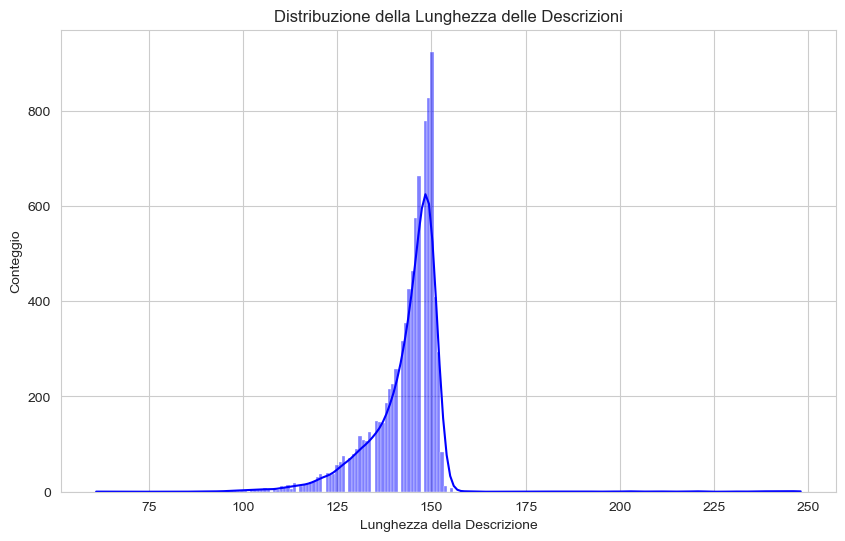

In [27]:
# visualizzo la lunghezza delle descrizioni
netflix_db["description_length"]=netflix_db["description"].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
sns.histplot(netflix_db["description_length"], kde=True, color="blue")
plt.title("Distribuzione della Lunghezza delle Descrizioni")
plt.xlabel("Lunghezza della Descrizione")
plt.ylabel("Conteggio")
plt.show()

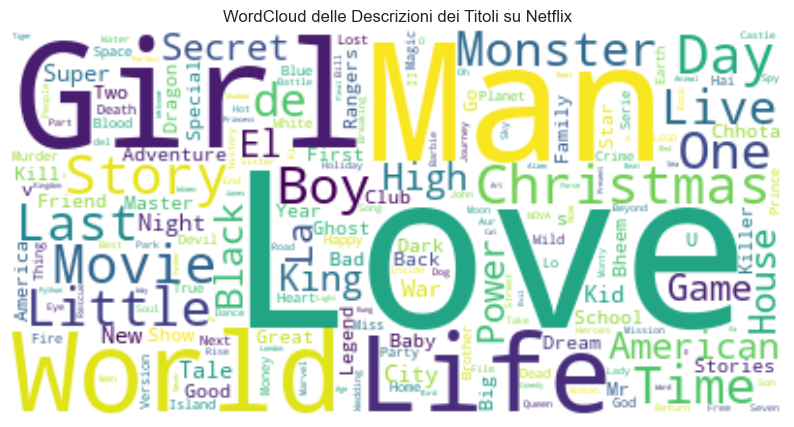

In [28]:
# creo un wordcloud con le parole più comuni nei titoli Netflix
text=" ".join(title for title in netflix_db.title)
word_cloud=WordCloud(collocations=False, background_color="white").generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(word_cloud, interpolation="bilinear")
plt.title("WordCloud delle Descrizioni dei Titoli su Netflix")
plt.axis("off")
plt.show()

In [29]:
# osservo il database focalòizzandomi sulla colonna registi
director_count=netflix_db.copy()
director_count=pd.concat([director_count, netflix_db["director"].str.split(",", expand=True)], axis=1)
director_count

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

     date_added  release_year rating   duration  ...     3     4     5     6  \
0    2021-09-25          2020  PG-13     90 min  ...  None  None  None  None   
1    2021-09-24          2021  TV-MA  2 Seasons  ...  None  None  None  None   
2    2021-09-24          2021  TV-MA   1 Season  ...  None  None  None  None   
3    2021-09-24          2021  TV-MA   1 Season  ...  None  None  None  None   
4    2021-09-24          2021  TV-MA  2 Seasons  ...  None  None  None  None   
...         ...           ...    ...        ...  ...   ...   ...   ...   ...   
8802 2019-11-20          2007      R    158 min  ...  None  None  None  None   
8803 2019-07-01          2018  TV-Y7  2 Seasons  ...  None  None  None  None   
8804 2019-11-01          2009      R     88 min  ...  None  None  None  None   
8805 2020-01-11          2006     PG     88 min  ...  None  None  None  None   
8806 2019-03-02          2015  TV-14    111 min  ...  None  None  None  None   

         7     8     9    10    11    12  
0     None  None  None  None  None  None  
1     None  None  None  None  None  None  
2     None  None  None  None  None  None  
3     None  None  None  None  None  None  
4     None  None  None  None  None  None  
...    ...   ...   ...   ...   ...   ...  
8802  None  None  None  None  None  None  
8803  None  None  None  None  None  None  
8804  None  None  None  None  None  None  
8805  None  None  None  None  None  None  
8806  None  None  None  None  None  None  

[8797 rows x 28 columns]

In [30]:
# conto le righe contenenti un valore nella colonna regista
director_count_melted=director_count.melt(id_vars=["type", "title"], value_vars=['director'], value_name="director_name")
director_count_melted=director_count_melted[director_count_melted["director_name"].notna()]
director_count_melted

type                             title  variable  \
0       Movie              Dick Johnson Is Dead  director   
2     TV Show                         Ganglands  director   
5     TV Show                     Midnight Mass  director   
6       Movie  My Little Pony: A New Generation  director   
7       Movie                           Sankofa  director   
...       ...                               ...       ...   
8791    Movie                           Zinzana  director   
8792    Movie                            Zodiac  director   
8794    Movie                        Zombieland  director   
8795    Movie                              Zoom  director   
8796    Movie                            Zubaan  director   

                      director_name  
0                   Kirsten Johnson  
2                   Julien Leclercq  
5                     Mike Flanagan  
6     Robert Cullen, José Luis Ucha  
7                      Haile Gerima  
...                             ...  
8791                Majid Al Ansari  
8792                  David Fincher  
8794                Ruben Fleischer  
8795                   Peter Hewitt  
8796                    Mozez Singh  

[6173 rows x 4 columns]

In [31]:
# conto i registi distinti
director_count["director"].nunique()

4528

In [32]:
# visualizzo i registi sulla base del numero di film che hanno diretto
director_count["director"].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

<Axes: xlabel='count', ylabel='director'>

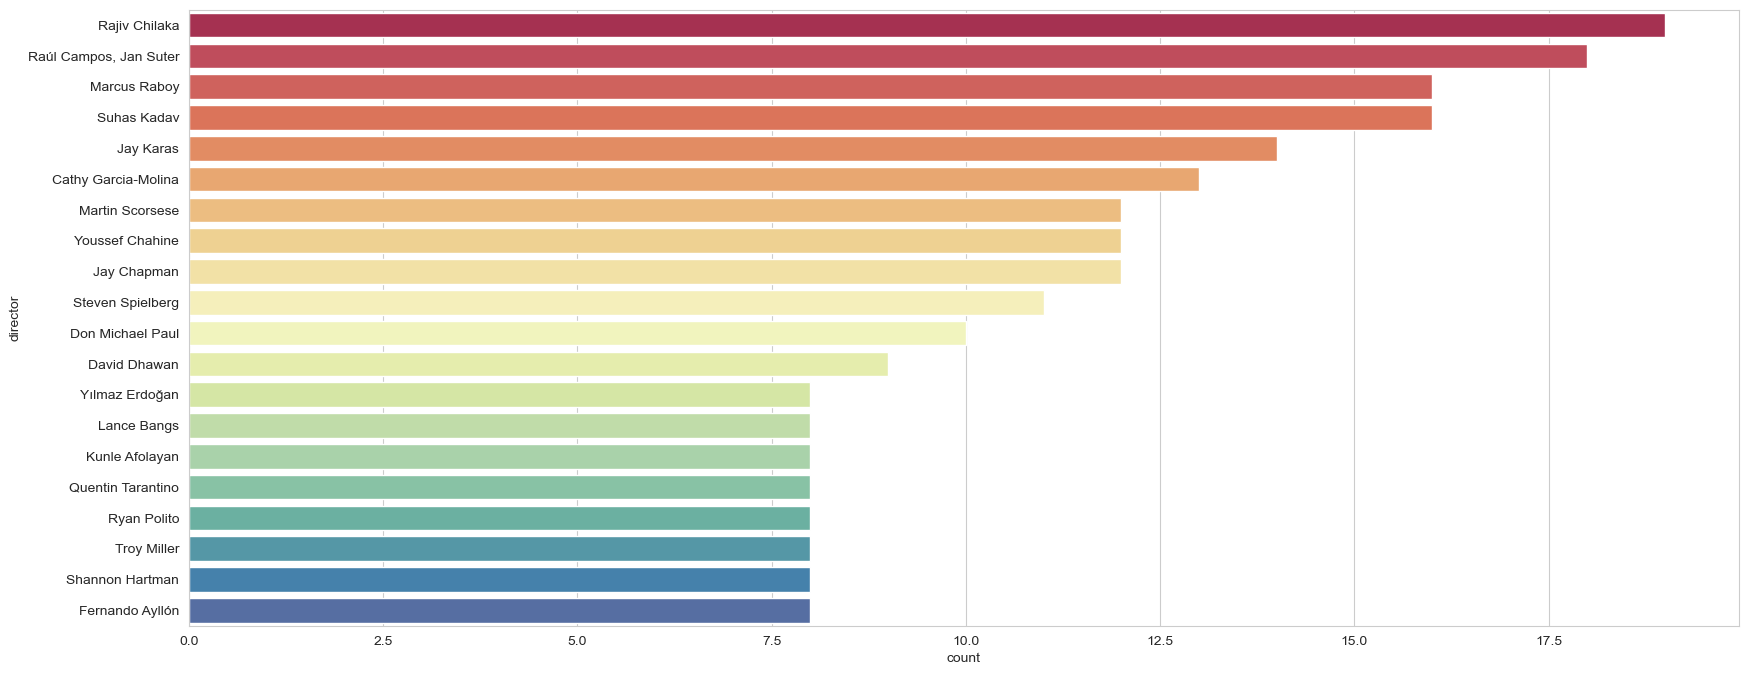

In [33]:
# traduco la visualizzazione in un grafico a barre
plt.figure(figsize=(20, 8))
director_count=director_count["director"].value_counts()[:20]
sns.barplot(x=director_count, y=director_count.index, palette="Spectral")

In [34]:
# creo una query per osservare solo i film francesi
film_francesi=netflix_db[(netflix_db["type"]=="Movie")&(netflix_db["country"]=="France")]["title"]
film_francesi

91      The Women and the Murderer
188               2 Alone in Paris
299                      The Swarm
634                     Wonder Boy
1110                 Madame Claude
                   ...            
8150                 Tarif de nuit
8168                         Terra
8218           The Boss's Daughter
8370          The Jack King Affair
8563                  The Workshop
Name: title, Length: 75, dtype: object

In [35]:
# faccio lo stesso con gli anni di rilascio più comuni
france_movies=netflix_db[netflix_db["country"].str.contains("France", na=False)]
most_common_release_years=france_movies["release_year"].value_counts().head(3)
print("Anni di rilascio più comuni:")
print(most_common_release_years)

Anni di rilascio più comuni:
release_year
2016    52
2019    49
2018    47
Name: count, dtype: int64


In [36]:
# replico lo stesso ragionamento con i generi
most_popular_genres=france_movies["listed_in"].value_counts().head(3)
print("Generi più popolari:")
print(most_popular_genres)

Generi più popolari:
listed_in
Dramas, Independent Movies, International Movies    46
Dramas, International Movies                        35
Kids' TV                                            28
Name: count, dtype: int64


In [37]:
most_common_ratings=france_movies["rating"].value_counts().head(3)
print("Classificazioni più comuni:")
print(most_common_ratings)

Classificazioni più comuni:
rating
TV-MA    163
R         57
TV-14     48
Name: count, dtype: int64


In [38]:
#la francia è al quinto posto per numero di contenuti presenti su netflix, con un totale di 393 titoli. 
#ciononostante, da queste analisi possiamo trarre alcuni spunti di miglioramento, per aumentare la visibilità e l'influenza del cinema francese nelle piattaforme di streaming
#sebbene i generi dramas, independent movies, e international movies siano ben rappresentati, potrebbe esserci spazio per espandere in altri generi meno presenti come: 
#documentari: espandere l'offerta di documentari francesi potrebbe attirare un pubblico interessato a contenuti educativi e informativi, commedie, fantascienza e fantasy.
#inoltre, dato che i rating per la maggior parte dei contenuti francesi sono per un pubblico over 18, si potrebbe pensare di ampliare il catalogo con contenuti family friendly.
#infine, si potrebbe pensare di ampliare l'offerta di contenutifrancesi con film e serie tv del ventesimo secolo, un periodo sottorappresentato per il cinema francese e non.
